In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Read the City and Ride Data
citydata = "data/city_data.csv"
city_pd = pd.read_csv(citydata)
city_pd.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ridedata = "data/ride_data.csv"
ride_pd = pd.read_csv(ridedata)
ride_pd.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# Combine the data into a single dataset
pyber_df = pd.merge(city_pd, ride_pd, on='city', how='outer')
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for each of the three city types
three_city_type = pyber_df.groupby('type')["fare"].sum().reset_index()
three_city_type

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [8]:
#Average Fare ($) Per City, Total Number of Rides Per City, Total Number of Drivers Per City
rural = pyber_df[pyber_df["type"] == "Rural"]
rural_ridecount = rural.groupby(["city"]).count()["ride_id"]
rural_fareavg = rural.groupby(["city"]).mean()["fare"]
rural_drivercount = rural.groupby(["city"]).count()["driver_count"]

In [9]:
suburban = pyber_df[pyber_df["type"] == "Suburban"]
suburban_ridecount =suburban.groupby(["city"]).count()["ride_id"]
suburban_fareavg = suburban.groupby(["city"]).mean()["fare"]
suburban_drivercount = suburban.groupby(["city"]).count()["driver_count"]

In [10]:
urban = pyber_df[pyber_df["type"] == "Urban"]
urban_ridecount = urban.groupby(["city"]).count()["ride_id"]
urban_fareavg = urban.groupby(["city"]).mean()["fare"]
urban_drivercount = urban.groupby(["city"]).count()["driver_count"]

Text(0,0.5,'Average Fare ($)')

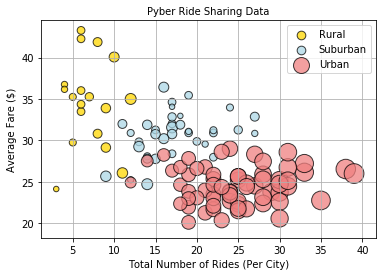

In [11]:
# Build the scatter plots for each city types  # Incorporate the other graph properties
plt.scatter(rural_drivercount, 
            rural_fareavg, 
            s=10*rural_drivercount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.75, label="Rural", facecolor='gold')

plt.scatter(suburban_ridecount, 
            suburban_fareavg, 
            s=10*rural_drivercount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.75, label="Suburban", facecolor='lightblue')

plt.scatter(urban_ridecount, 
            urban_fareavg, 
            s=10*urban_drivercount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.75, label="Urban", facecolor='lightcoral')


# Create a legend  # Incorporate a text label regarding circle size
plt.legend(fontsize=10)
plt.grid()
plt.title('Pyber Ride Sharing Data', fontsize=10)
plt.xlabel('Total Number of Rides (Per City)', fontsize=10)
plt.ylabel('Average Fare ($)', fontsize=10)

In [12]:
# Save Figure
plt.savefig("../Pyber/images/pyber_scatter.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

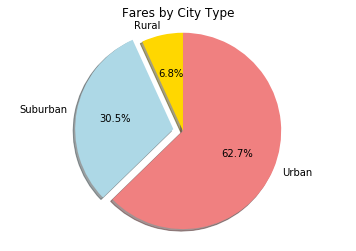

In [13]:
# Calculate Type Percents
types = three_city_type["type"]
fares = three_city_type["fare"]
colors = ["gold", "lightblue", "lightcoral"]
explode = (0, 0.1, 0)

# Build Pie Chart
plt.pie(fares, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90)
plt.title("Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/images/pyber_pie_fare.png")
plt.show()

## Total Rides by City Type

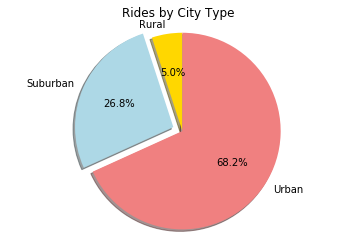

In [14]:
# Calculate Ride Percents
rides_pd = pyber_df.groupby('type')["ride_id"].sum().reset_index()
rides = rides_pd["ride_id"]
types = three_city_type["type"]
colors = ["gold", "lightblue", "lightcoral"]
explode = (0, 0.1, 0)

# Build Pie Chart
plt.pie(rides, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90)
plt.title("Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/images/pyber_pie_ride.png")
plt.show()

## Total Drivers by City Type

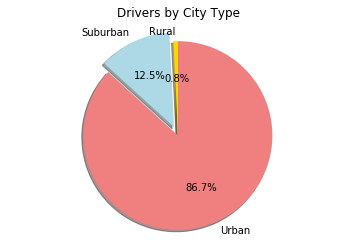

<Figure size 432x288 with 0 Axes>

In [187]:
# Calculate Driver Percents
driver_pd = pyber_df.groupby('type')["driver_count"].sum().reset_index()
drivers = driver_pd["driver_count"]
types = three_city_type["type"]
colors = ["gold", "lightblue", "lightcoral"]
explode = (0, 0.1, 0)

# Build Pie Charts
plt.pie(drivers, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90)
plt.title("Drivers by City Type")
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("../Pyber/images/pyber_pie_driver.png")

In [ ]:
#Three Observable Trends
#1. Average Fare tends to be more expensive and the amount of rides are much more lesser than suburban and urban areas. 
#2. More than a half of the income were coming from urban area.
#3. Pyber are more popupar in Urban area since it has most of the rides and drivers.